In [1]:
from inpaint.data import *
from inpaint.utils import random_ff_mask, random_bbox_mask
from PIL import Image
import argparse
from PIL import Image, ImageDraw

import torch
import numpy as np
import platform

from torchvision import transforms
from torch.utils.data import Dataset
import torchvision
# import utils
from inpaint.utils import utils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from time import sleep
from IPython.display import display # to display imag

In [2]:
path = "../samples/Places365"
if platform.system().lower() == 'windows':
    path = "..\samples\Places365"

In [3]:
dataset = PlacesDataset(path_dir = path, transform_config=('to_tensor', 'random_crop', 'norm'), crop_size=(384,384))
image_lst = dataset.imglist
print("Total images:", len(dataset))
dataset[0].shape

Total images: 24


/home/goswami.p/miniconda3/envs/inpaint/lib/python3.8/site-packages/torchvision/transforms/transforms.py:852: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


torch.Size([3, 384, 384])

In [4]:
from inpaint.utils import denorm

img_shape =  torch.Size([3, 384, 384])
mask_shape =  (1, 384, 384)
tensor([[[ 0.5843,  0.6000,  0.5843,  ...,  0.5922,  0.5765,  0.5922],
         [ 0.6000,  0.6000,  0.6000,  ...,  0.5922,  0.5922,  0.5922],
         [ 0.6000,  0.6000,  0.6000,  ...,  0.5922,  0.5922,  0.5922],
         ...,
         [-0.2471, -0.2941, -0.4745,  ..., -0.5922, -0.6392, -0.6314],
         [-0.2941, -0.4039, -0.6314,  ..., -0.5922, -0.6392, -0.6157],
         [-0.4353, -0.4118, -0.7098,  ..., -0.5529, -0.6392, -0.6314]],

        [[ 0.8275,  0.8196,  0.8275,  ...,  0.8118,  0.8196,  0.8118],
         [ 0.8196,  0.8196,  0.8196,  ...,  0.8118,  0.8118,  0.8118],
         [ 0.8196,  0.8196,  0.8196,  ...,  0.8118,  0.8118,  0.8118],
         ...,
         [-0.3882, -0.4118, -0.5765,  ..., -0.6627, -0.7098, -0.7020],
         [-0.4353, -0.5216, -0.7333,  ..., -0.6627, -0.7098, -0.6863],
         [-0.5765, -0.5294, -0.8118,  ..., -0.6235, -0.7098, -0.7020]],

        [[ 0.9843,  0.9843,  0.9843,  ...,  0.976

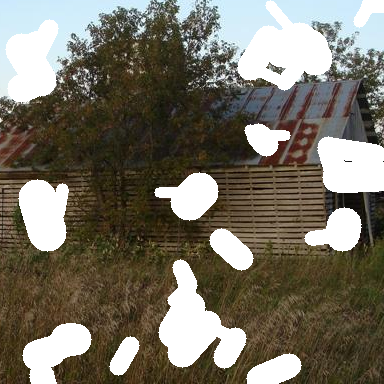

In [19]:
%matplotlib inline

# for index, path in enumerate(image_lst):

img = dataset[10]
C, H, W = img.shape

mask =  random_ff_mask(shape = (H, W), max_angle=10, max_len=40, max_width=30, times=20)

print("img_shape = ", img.shape)
print("mask_shape = ",mask.shape)
print(img)
img = denorm(img)
masked_img = img * (1 - mask) + mask

print("masked_img shape = ",masked_img.shape) 

trans = transforms.ToPILImage()
# trans(masked_img)
# mask = torch.cat((mask, mask, mask), 1)
display(trans(masked_img))

In [13]:
mask = np.concatenate((mask, mask, mask), 0)
mask = np.transpose(mask, (1,2,0))
mask.shape

(384, 384, 3)

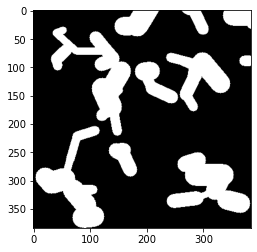

In [15]:
plt.imshow(mask)

In [16]:
np.unique(mask)

array([0., 1.], dtype=float32)

In [ ]:
%matplotlib inline
# for index, path in enumerate(image_lst):

img = dataset[70]
C, H, W = img.shape

mask =  random_bbox_mask(shape = (H, W), margin=(10,10), bbox_shape=(100,100), times=20)

img = denorm(img)
masked_img = img * (1 - mask) + mask

trans = transforms.ToPILImage()
# trans(masked_img)
# mask = torch.cat((mask, mask, mask), 1)
display(trans(masked_img))
# mask = torch.cat([mask,mask,mask],1)